# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labasa
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | dikhil
Processing Record 9 of Set 1 | nakhodka
Processing Record 10 of Set 1 | bonthe
Processing Record 11 of Set 1 | nishinoomote
Processing Record 12 of Set 1 | nowshahr
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | mildura
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | bamboo flat
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | papao
Processing Record 22 of Set 1 | edinburgh of the

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labasa,-16.4167,179.3833,26.10,67,100,2.53,FJ,1731098784
1,wailua homesteads,22.0669,-159.3780,26.44,71,75,8.75,US,1731098785
2,port-aux-francais,-49.3500,70.2167,3.91,65,1,8.09,TF,1731098786
3,kingston,17.9970,-76.7936,28.98,89,40,6.17,JM,1731098787
4,morant bay,17.8815,-76.4093,28.03,80,31,3.71,JM,1731098788


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labasa,-16.4167,179.3833,26.10,67,100,2.53,FJ,1731098784
1,wailua homesteads,22.0669,-159.3780,26.44,71,75,8.75,US,1731098785
2,port-aux-francais,-49.3500,70.2167,3.91,65,1,8.09,TF,1731098786
3,kingston,17.9970,-76.7936,28.98,89,40,6.17,JM,1731098787
4,morant bay,17.8815,-76.4093,28.03,80,31,3.71,JM,1731098788


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

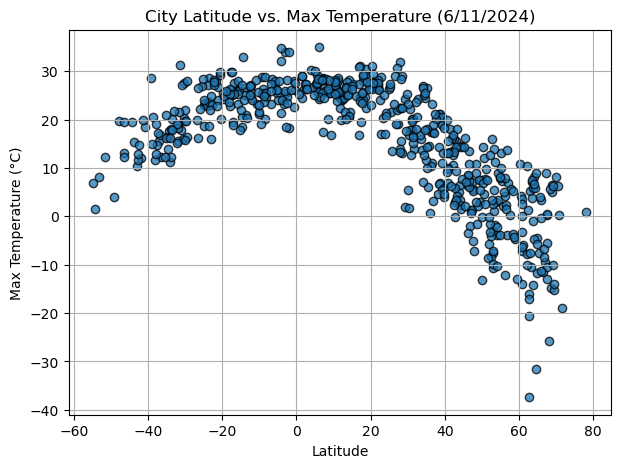

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (6/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

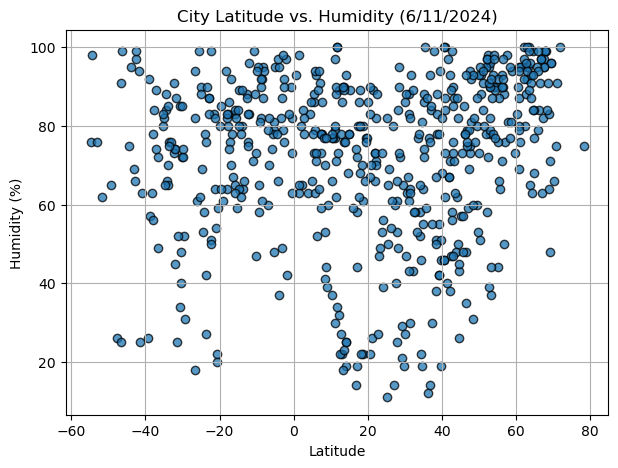

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (6/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

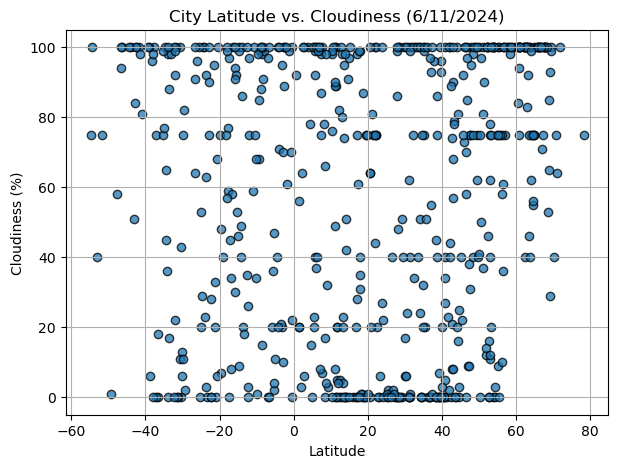

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (6/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

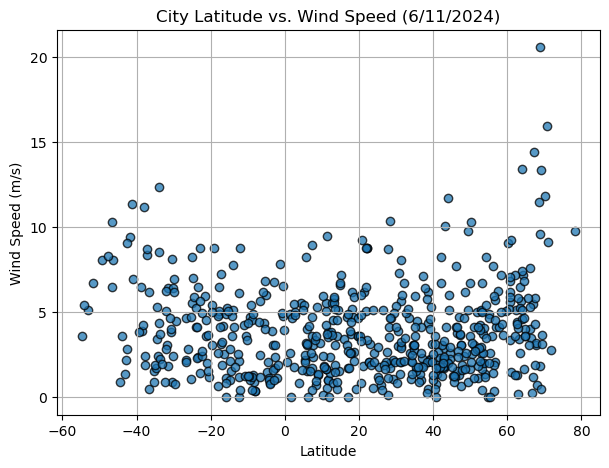

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (6/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title, filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Plot the scatter plot and regression line
    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, edgecolors='black', alpha=0.75, label='Data Points')
    plt.plot(x, regression_line, color='red', label=f'Linear Regression (R² = {r_value**2:.2f})')

    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Display the regression equation on the plot
    plt.text(x.min() + 5, y.min() + 5, f"y = {slope:.2f}x + {intercept:.2f}", color='red', fontsize=12)

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

    # Print the regression equation and R-squared value
    print(f"Regression equation: y = {slope:.2f}x + {intercept:.2f}")
    print(f"R-squared: {r_value**2:.2f}")


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,26.44,71,75,8.75,US,1731098785
3,kingston,17.9970,-76.7936,28.98,89,40,6.17,JM,1731098787
4,morant bay,17.8815,-76.4093,28.03,80,31,3.71,JM,1731098788
6,cabo san lucas,22.8909,-109.9124,28.75,47,0,3.13,MX,1731098790
7,dikhil,11.5000,42.1667,24.67,62,0,3.81,DJ,1731098791


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labasa,-16.4167,179.3833,26.10,67,100,2.53,FJ,1731098784
2,port-aux-francais,-49.3500,70.2167,3.91,65,1,8.09,TF,1731098786
5,blackmans bay,-43.0167,147.3167,10.41,69,51,1.34,AU,1731098789
12,papatowai,-46.5619,169.4708,13.13,91,94,6.49,NZ,1731098796
13,luderitz,-26.6481,15.1594,16.19,82,91,2.17,NaN,1731098798


###  Temperature vs. Latitude Linear Regression Plot

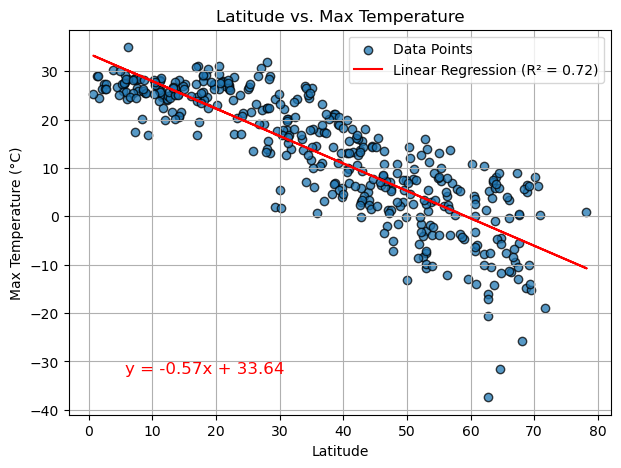

Regression equation: y = -0.57x + 33.64
R-squared: 0.72


In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],                
    northern_hemi_df['Max Temp'],           
    'Latitude',                             
    'Max Temperature (°C)',                 
    'Latitude vs. Max Temperature',         
    'output_data/Lat_vs_MaxTemp.png'        
)

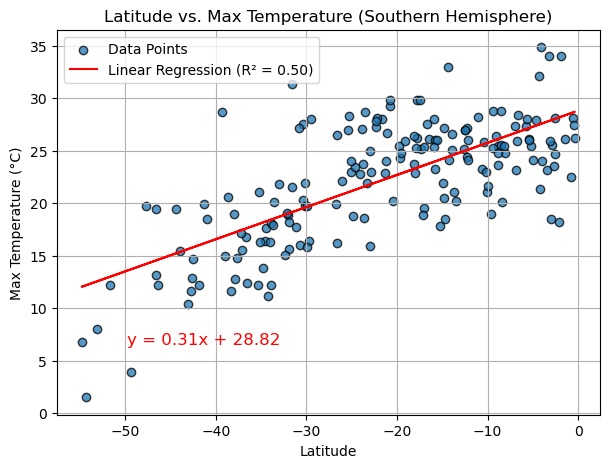

Regression equation: y = 0.31x + 28.82
R-squared: 0.50


In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],                
    southern_hemi_df['Max Temp'],           
    'Latitude',                             
    'Max Temperature (°C)',                 
    'Latitude vs. Max Temperature (Southern Hemisphere)',  
    'output_data/Lat_vs_MaxTemp_Southern.png'  
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression calculations are analysing the relationship between Latitude and maximum temperature, for the Northern and Southern Hemispheres. From the calculation, we can see that the slope for the Northern hemisphere is negative, indicating an inverse relationship between Latitude and max temperature. This makes sense, because as you move further north, max temperatures are expected to drop. The opposite is true for the Southern Hemisphere, as the positive slope rightly highlights that temperatures increase as you move further South. However the R-square values are a bit inconsistent for both models. 

The R-square of 0.72 for the Northern Hemisphere indicates a much stronger relationship among the variables, compared to the Southern Hemisphere which has a relatively lower R-square of 0.5.

### Humidity vs. Latitude Linear Regression Plot

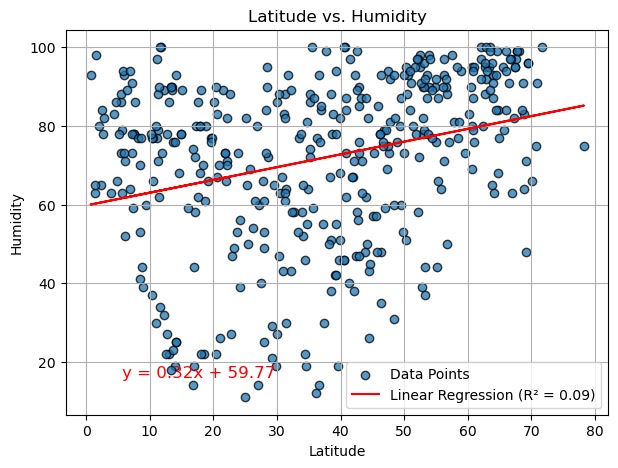

Regression equation: y = 0.32x + 59.77
R-squared: 0.09


In [28]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],                
    northern_hemi_df['Humidity'],           
    'Latitude',                             
    'Humidity',                 
    'Latitude vs. Humidity',         
    'output_data/Lat_vs_Humidity.png'        
)

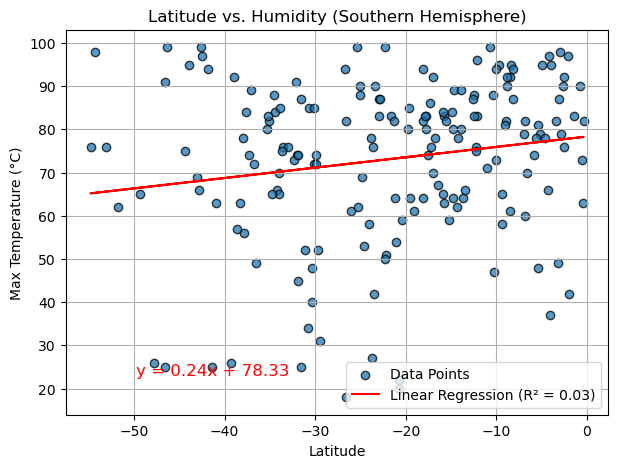

Regression equation: y = 0.24x + 78.33
R-squared: 0.03


In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],                
    southern_hemi_df['Humidity'],           
    'Latitude',                             
    'Max Temperature (°C)',                 
    'Latitude vs. Humidity (Southern Hemisphere)',  
    'output_data/Lat_vs_Humidity_Southern.png'  
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Though both hemispheres seem to display a positive relationship between latitude and humidity, it should be noted that there are a large number of outliers in this calculation, as is apparent from the plots. The R-square values of 0.09 and 0.03 are very low for both Norhtern and Southern hemispheres, respectively. This indicates that the data does not fit the regression model very well, and there may be a number of variables not explained by the data used.

This makes sense, as Humidity can be very difficult to predict and any analysis on it can result in significant outliers. It can also mean that Latitude is not an effective indicator of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

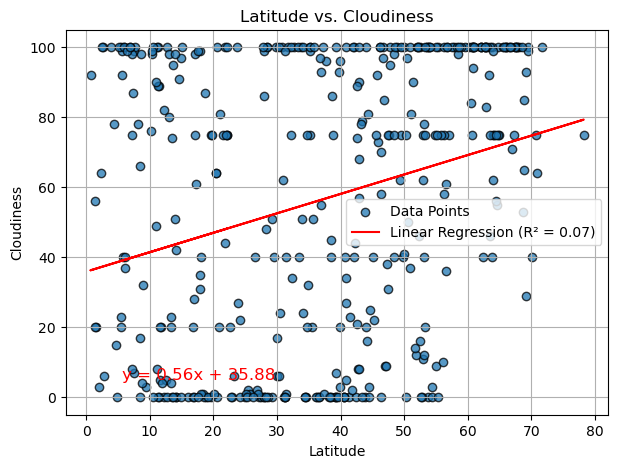

Regression equation: y = 0.56x + 35.88
R-squared: 0.07


In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],                
    northern_hemi_df['Cloudiness'],           
    'Latitude',                             
    'Cloudiness',                 
    'Latitude vs. Cloudiness',         
    'output_data/Lat_vs_Cloudiness.png'        
)

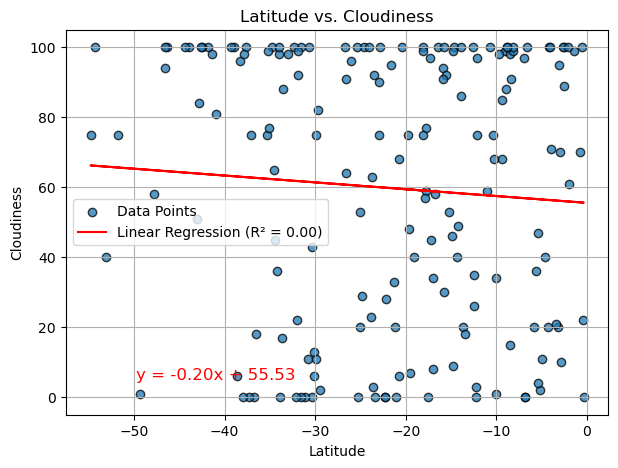

Regression equation: y = -0.20x + 55.53
R-squared: 0.00


In [33]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],                
    southern_hemi_df['Cloudiness'],           
    'Latitude',                             
    'Cloudiness',                 
    'Latitude vs. Cloudiness',         
    'output_data/Lat_vs_Cloudiness.png'  
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

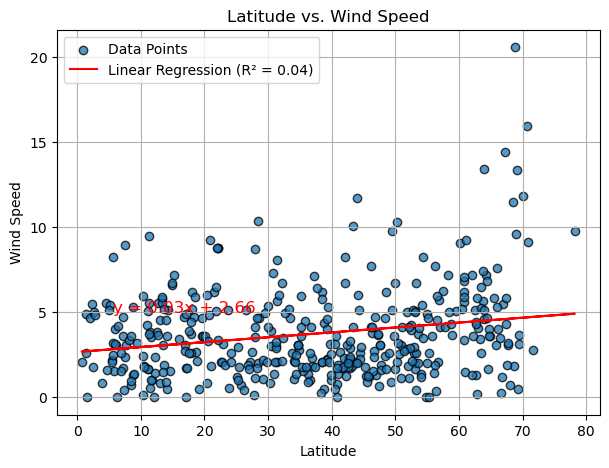

Regression equation: y = 0.03x + 2.66
R-squared: 0.04


In [34]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],                
    northern_hemi_df['Wind Speed'],           
    'Latitude',                             
    'Wind Speed',                 
    'Latitude vs. Wind Speed',         
    'output_data/Lat_vs_Wind Speed.png'        
)

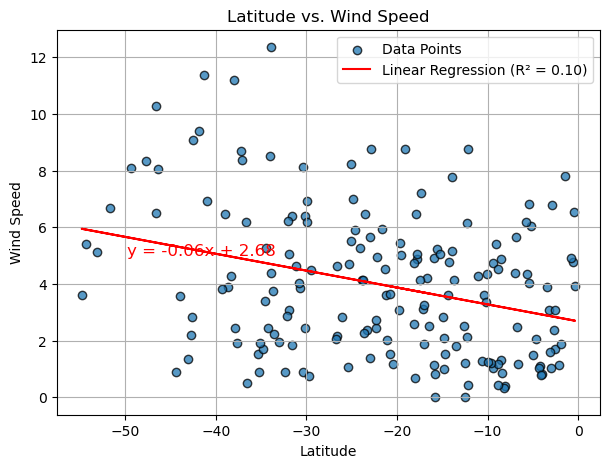

Regression equation: y = -0.06x + 2.68
R-squared: 0.10


In [35]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],                
    southern_hemi_df['Wind Speed'],           
    'Latitude',                             
    'Wind Speed',                 
    'Latitude vs. Wind Speed',         
    'output_data/Lat_vs_Wind Speed.png'  
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE